# Concurso Halloween 2021 Grow Up

Este *notebook* tiene como objetivo entregar un informe respecto a un conjunto de datos de disfraces con el fin de participar en el concurso de análisis de de datos con temática de Halloween de **Grow Up**. 

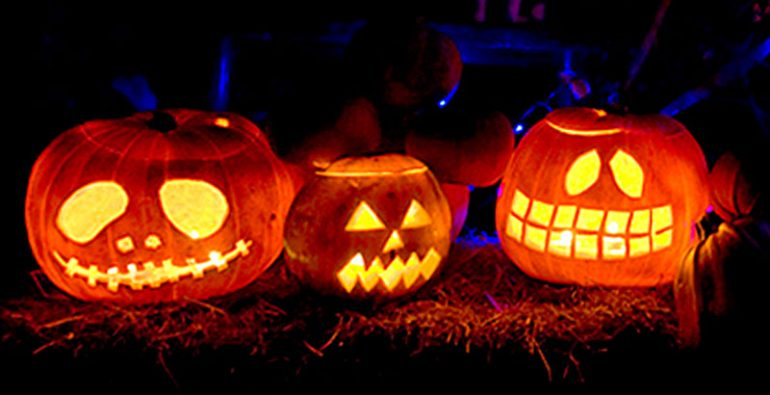 [1]

## 0. Importar librerias y datos

Empezamos importando las librerias que utilizaremos en este análisis.

In [ ]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110

# Librería de datos geoespaciales GeoPandas.
!pip install -U geopandas
!pip install -U rtree mapclassify fiona pyproj
!sudo apt install libspatialindex-dev
import geopandas as gpd
import shapely
from shapely.geometry import *
import plotly
import plotly.graph_objs as go 
import plotly.express as px


# Para estadística
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 49.0 MB/s 
     |████████████████████████████████| 994 kB 4.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 li

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#TEST_CELL
!python --version
print('GeoPandas', gpd.__version__)
print('Plotly', plotly.__version__)
print('Shapely', shapely.__version__)
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.7.12
GeoPandas 0.10.2
Plotly 4.4.1
Shapely 1.7.1
SciPy 1.4.1
statsmodels 0.10.2
Pandas 1.1.5
NumPy 1.19.5
Matplotlib 3.2.2
Seaborn 0.11.2


Este material fue ralizado con las siguientes versiones:

* Python 3.7.12
* GeoPandas 0.10.2
* Plotly 4.4.1
* Shapely 1.7.1
* SciPy 1.4.1
* statsmodels 0.10.2
* Pandas 1.1.5
* NumPy 1.19.5
* Matplotlib 3.2.2
* Seaborn 0.11.2

Continuaremos conectando el *notebook* con el drive en el que se encuentra la base de datos a utilizar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Exploraremos donde está la base de datos.
%cd '/content/drive/MyDrive/Colab Notebooks/Concursos/db'
!ls

/content/drive/MyDrive/Colab Notebooks/Concursos/db
2020Disfraces.csv


A continuación cargamos los datos del archivo de tipo CSV en un *DataFrame* de *Pandas* desde Drive.

También se puede conseguir el *dataset* en este [enlace](https://preppindata.blogspot.com/2020/10/2020-week-44.html).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Concursos/db/2020Disfraces.csv')

## 1. Entendimiento del negocio.

Estos datos están enfocados en la venta de disfraces a nivel mundial en 2 años consecutivos, 2019 y 2020. Estos datos son traidos por una empresa que se dedica a esta actividad económica, de forma que quieren comparar los ingresos de su año fiscal con el anterior, los cuales empiezan en Noviembre.

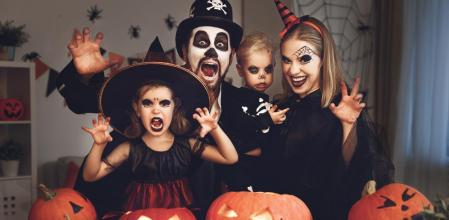 [2]

## 2. Entendimiento de los datos.

Lo primero que debemos tener en cuenta es que en la página de donde descargamos este *dataset* hay un archivo con los datos sin limpiar y otro con los datos limpios, por facilidad usaremos el conjunto de datos limpio ya que nos ahorra limpieza simple cono errores de tipografia, traducción del nombre de los disfraces, entre otras cosas. Aún así nos aseguraremos de que este totalmente limpio más adelante.

Empezamos viendo como esta dividido este conjunto de datos, comenzando por la información que nos brindan las columnas que son 'disfraz', 'país', 'moneda', 'precio', que no es un valor numérico sino una referencia a si se pago completo o con descuento, y los 'años fiscales' 2019 por un lado y 2020 por el otro para un total de 6 columnas.



In [ ]:
df.columns

Index(['Costume', 'Country', 'Currency', 'Price', '2019 FY Sales',
       '2020 FY Sales'],
      dtype='object')

Veamos un ejemplo de lo que nos vamos a encontrar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Costume        231 non-null    object
 1   Country        231 non-null    object
 2   Currency       231 non-null    object
 3   Price          231 non-null    object
 4   2019 FY Sales  231 non-null    int64 
 5   2020 FY Sales  231 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 11.0+ KB


In [ ]:
df.head()

Costume      Country Currency    Price  2019 FY Sales  2020 FY Sales
0  Dinosaur      Croatia     Kuna     Full        6970468        6186874
1       Cat  Netherlands        €  Quarter           7146           7734
2     Ghost      Ireland        €     Half          14574          16030
3   Vampire      Denmark    Krone     Half          86640          61320
4    Pirate      Croatia     Kuna     Half         117271         105970

In [ ]:
df.describe()

2019 FY Sales  2020 FY Sales
count   2.310000e+02   2.310000e+02
mean    6.992407e+07   6.397395e+07
std     9.982447e+08   9.111004e+08
min     4.031000e+03   3.924000e+03
25%     1.017450e+04   8.910500e+03
50%     3.184800e+04   3.182800e+04
75%     8.503655e+05   7.632030e+05
max     1.516913e+10   1.384455e+10

Vemos que todas las variables son categóricas menos los años fiscales que si son numéricos.

Veamos cuantos valores unicos tiene cada variable.

In [ ]:
df.nunique()

Costume            9
Country           22
Currency          12
Price              3
2019 FY Sales    230
2020 FY Sales    231
dtype: int64

Vemos que la empresa vendió 9 tipos de disfraces en 22 países con 12 distintas monedas, cutos precios fueron un cuarto, medio o completo y las ganancias que representaron para cada año.

Hay que aclarar el significado de estos datos, por cada disfraz tendremos 3 filas en cada país, que tendrá una moneda de curso legal según su territorio, siendo cada una de las filas el tipo de descuento que tuvieron las ventas y el año fiscal será la suma de los precios de todas las compras de ese disfraz en ese año.

Miremos un ejemplo.

In [ ]:
df.loc[(df['Country'] == 'Poland') & (df['Costume'] == 'Devil')]

Costume Country Currency    Price  2019 FY Sales  2020 FY Sales
30    Devil  Poland    Zloty     Full        3717907        4148605
186   Devil  Poland    Zloty     Half          74383          56036
204   Devil  Poland    Zloty  Quarter          30318          29874

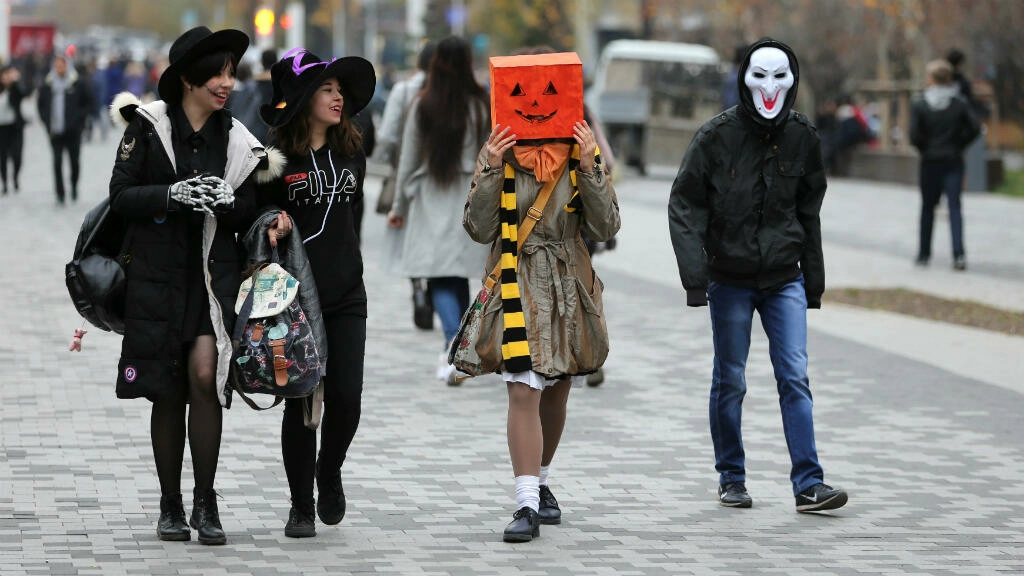 [3]

## 3. Preparación de los datos.

Como mencionamos anteriormente el conjunto de fue limpiado por la persona que lo subió, y con la función 'info' de *Pandas* vemos que no hay valores nulos.

In [ ]:
df['Currency'].unique()

array(['Kuna', '€', 'Krone', '£', '$', 'A$', 'Zloty', 'New Leu', 'Krona',
       'Forint', 'Rupia', 'Peso'], dtype=object)

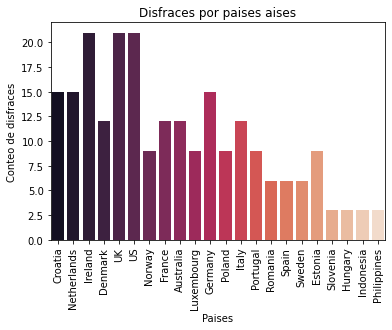

In [ ]:
paises = sns.countplot(x='Country', data=df, palette='rocket', hue_order='Country')
paises.set_xticklabels(paises.get_xticklabels(), rotation=90)

plt.title('Disfraces por paises aises')
plt.ylabel('Conteo de disfraces')
plt.xlabel('Paises')

paises

In [ ]:
df['Price'].unique()

array(['Full', 'Quarter', 'Half'], dtype=object)

In [ ]:
df['Costume'].unique()

array(['Dinosaur', 'Cat', 'Ghost', 'Vampire', 'Pirate', 'Zombie', 'Clown',
       'Devil', 'Werewolf'], dtype=object)

Con las celdas anteriores podemos confirmar la integridad de los datos, de manera que también exploramos como están distribuidos. De esta forma concluimos con la limpieza de datos.

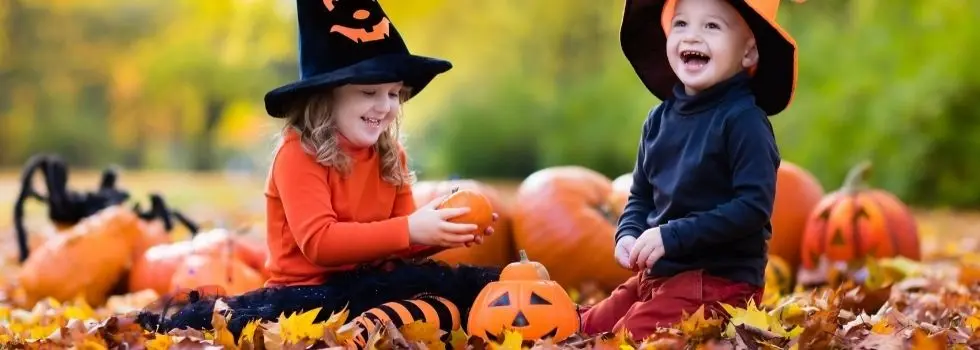 [4]

## 4. Análisis de datos.

En esta sección entraremos en materia, al centro de la compertencia. Analizaremos estos datos que hemos explorado.

### 4.1. Análisis estadístico.

Usaremos herramientas estádisticas para ver como se relacionan los datos entre si.

#### 4.1.1. Análisis de hipótesis.

En la parte exploratoria de este informe pudimos ver como se relacionaban las ganancias de los años fiscales respecto a las distintas promociones con las que se compraron los disfraces. Se propone la hipótesis de que las mayores ganancias se presentan cuando el precio es completo, lo que en la vida real no siempre sucede por el ahorro en los costos de almacenaje. Por lo que sumaremos las ganancias de ambos años, y también sumaremos las ganancias de los 2 tipos de descuentos y procederemos con 2 hipótesis, una nula y otra alterna, siendo la alterna la que apoyamos.

**Hipótesis:**


*   Hipótesis nula $H_0: \mu_m =< \mu_f$, las ganancias del precio completo son menores o iguales que las ganancias de los descuentos.

*   Hipótesis alternativa $H_a: \mu_m \gt \mu_f$, las ganancias del precio completo son mayores que las ganancias con descuentos. 

In [ ]:
ganancias = ['2019 FY Sales', '2020 FY Sales']
df['Ganancia Total'] = df[ganancias].sum(axis=1)
df

Costume      Country  ... 2020 FY Sales Ganancia Total
0    Dinosaur      Croatia  ...       6186874       13157342
1         Cat  Netherlands  ...          7734          14880
2       Ghost      Ireland  ...         16030          30604
3     Vampire      Denmark  ...         61320         147960
4      Pirate      Croatia  ...        105970         223241
..        ...          ...  ...           ...            ...
226     Clown           UK  ...          6402          11392
227   Vampire  Netherlands  ...          7500          14868
228  Dinosaur      Croatia  ...         51856          87752
229    Pirate           UK  ...         10430          20958
230  Dinosaur    Indonesia  ...     139169962      275476617

[231 rows x 7 columns]

In [ ]:
Ha = df['Ganancia Total'].loc[(df['Price'] == 'Full')].sum()
Ha

30017963203

In [ ]:
x = df['Ganancia Total'].loc[(df['Price'] == 'Quarter')].sum()
y = df['Ganancia Total'].loc[(df['Price'] == 'Half')].sum()
Hn = x+y
Hn

912480469

In [ ]:
Ha > Hn

True

Con esto demostramos que las ganancias del precio completo son mayores que las ganancias de los descuentos por lo que aceptamos nuestra hipótesis alternativa.

In [ ]:
Pastel = df[['Price', 'Ganancia Total']]
Pastel

Price  Ganancia Total
0       Full        13157342
1    Quarter           14880
2       Half           30604
3       Half          147960
4       Half          223241
..       ...             ...
226  Quarter           11392
227  Quarter           14868
228  Quarter           87752
229     Half           20958
230  Quarter       275476617

[231 rows x 2 columns]

In [ ]:
pas = df['Ganancia Total'].loc[(df['Price']=='Full')].sum()
pas

30017963203

In [ ]:
past = df['Ganancia Total'].loc[(df['Price']=='Half')].sum()
past

629308796

In [ ]:
paste = df['Ganancia Total'].loc[(df['Price']=='Quarter')].sum()
paste

283171673

In [ ]:
pastel = pd.DataFrame([['Full', pas], ['Half', past], ['Quarter', paste]])
pastel

0            1
0     Full  30017963203
1     Half    629308796
2  Quarter    283171673

In [ ]:
explode = (0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
colors =['yellow', 'orange', 'red']

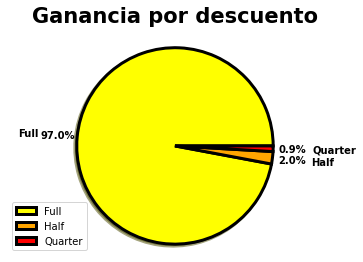

In [ ]:
plt.pie(pastel[1], labels=pastel[0],
        startangle=0, colors=colors, autopct='%1.1f%%', shadow=True, pctdistance=1.2,
        labeldistance=1.4, textprops={'fontweight':'bold','fontsize':10},
        wedgeprops={'linewidth':3, 'edgecolor':"k"})
plt.legend(loc=3, fontsize=10)
plt.title('Ganancia por descuento', fontweight='bold', fontsize=21, pad=15)
plt.axis('equal')
plt.show()

Con esta gráfica pastel vemos que efectivamente prácticamente todas las ganancias vienen de las ventas a precio completo, teniendo los descuentos una participacion marginal.

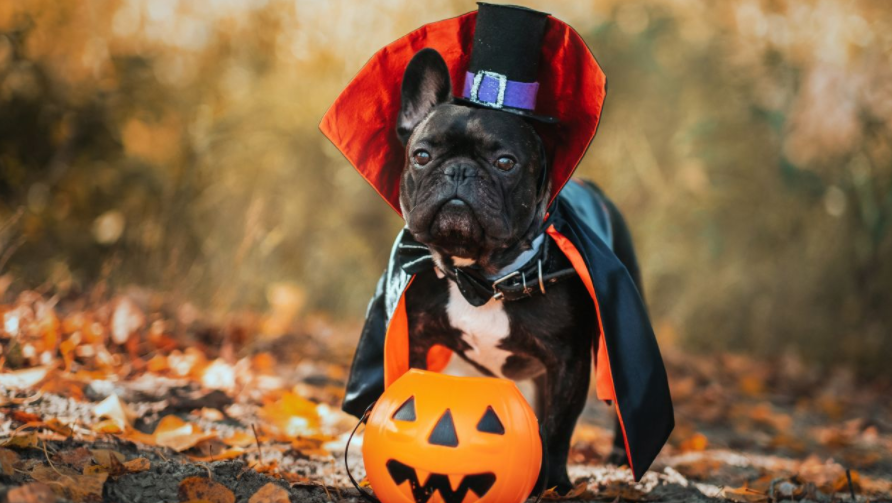 [5]

### 4.1.2. Análisis de ingresos.

En esta sección buscaremos relaciones entre los datos, especificamente en el area de ingresos por cada variable.

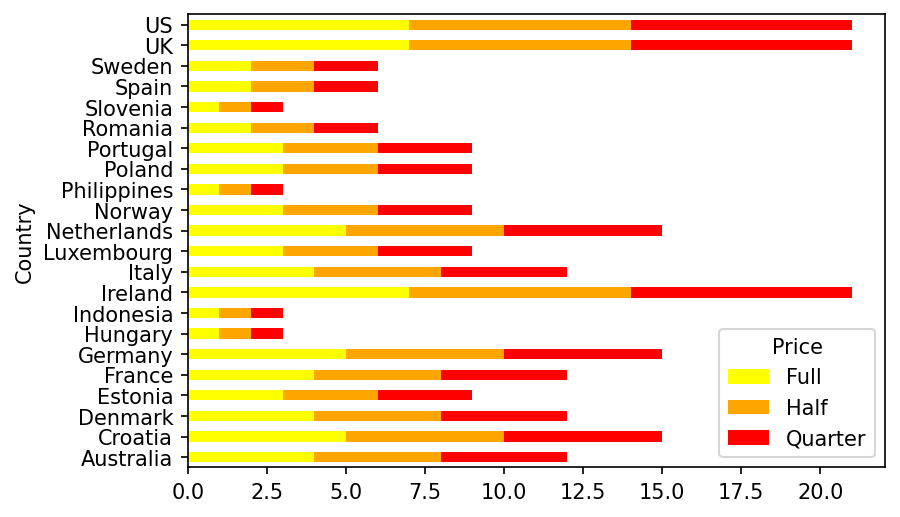

In [ ]:
df_plotP = df.groupby(['Price', 'Country']).size().reset_index().pivot(columns='Price', index='Country', values=0)
plt.rcParams['figure.dpi'] = 150
df_plotP.plot(kind='barh', stacked=True, color=colors)

Y en esta grafica vemos la distribución de los descuentos por países, vemos que el número de compras a precio completo como con descuento se dan en la misma proporción. Esto significa que 1 tercio de las ventas dan el 97% de las ganancias.

In [ ]:
Pais = df[['Country', 'Costume']].value_counts()
Pais

Country    Costume 
US         Zombie      3
Ireland    Cat         3
Germany    Cat         3
           Ghost       3
           Pirate      3
                      ..
Poland     Dinosaur    3
           Zombie      3
Portugal   Cat         3
           Devil       3
Australia  Cat         3
Length: 77, dtype: int64

In [ ]:
df_plot = df.groupby(['Costume', 'Country']).size().reset_index().pivot(columns='Costume', index='Country', values=0)

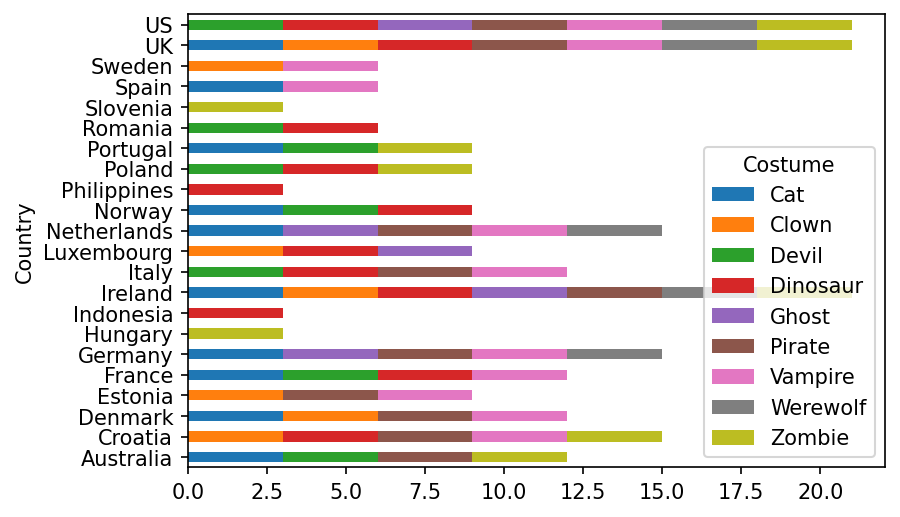

In [ ]:
plt.rcParams['figure.dpi'] = 150
df_plot.plot(kind='barh', stacked=True)

Como podemos observar, los paises que más compran disfraces de esta empresa son Estados Unidos, Reino Unido e Irlanda, además de que en cada país se venden los disfraces con un máximo de 3 disfraces de cada tipo.

A continuación imprimiremos estos datos en un mapa coroplético interactivo.

In [ ]:
location = pd.DataFrame([['USA', 'US', 21], ['GBR', 'UK', 21], ['IRL', 'Ireland', 21],
                         ['NLD', 'Netherlands', 15], ['DEU', 'Germany', 15], ['HRV', 'Croatia', 15],
                         ['ITA','Italy', 12], ['FRA', 'France', 12], ['DNK', 'Denmark', 12], ['AUS', 'Australia', 12],
                         ['PRT', 'Portugal', 9], ['POL', 'Polonia', 9], ['NOR', 'Norway', 9], ['LUX', 'Luxembourg', 9], ['EST', 'Estonia', 9],
                         ['SWE', 'Sweden', 6], ['ESP', 'Spain', 6], ['ROU', 'Romania', 6],
                         ['SVN', 'Slovenia', 3], ['PHL', 'Philippines', 3], ['IDN', 'Indonesia', 3], ['HUN', 'Hungary', 3]])

In [ ]:
choropleth = go.Choropleth(        
        locations = location[0],            # Códigos por país usados en la ubicación del scope mundial.
        z = location[2],                    # Valor representado por la escala de color. Usamos el GDP nacional.
        text = location[1],                 # Texto mostrado al pasar el mouse. En este caso mostramos el nombre del país.
        colorbar = {                        # Configuración (título) de la barra de colores.
            'title' : 'Paises con más ventas'   
            },
        colorscale = 'ylgnbu'               # Paleta/escala de color usada.
      ) 
data = [choropleth]

In [ ]:
layout = dict(
    title = 'Número de disfraces por países',
    geo = dict(
        # No es necesario configurar el "scope". Por defecto scope='world".
        projection = {'type':'orthographic'},      # Pruebe otras opciones de la lista de arriba.
        showocean = True,
        oceancolor = 'rgb(85,173,240)',             # Color del océano.
        showlakes = True,              # Permitimos la visualización de lagos en la geografía mostrada.
        lakecolor = 'rgb(85,173,240)' # Color de los lagos.  (Un tono de azul claro)
    ),
    width = 800
)

In [ ]:
# Mostramos el mapa generado.
mapa = go.Figure(data = data, layout = layout)
mapa.show()

In [ ]:
df_plot1 = df.groupby(['Costume', 'Currency']).size().reset_index().pivot(columns='Costume', index='Currency', values=0)

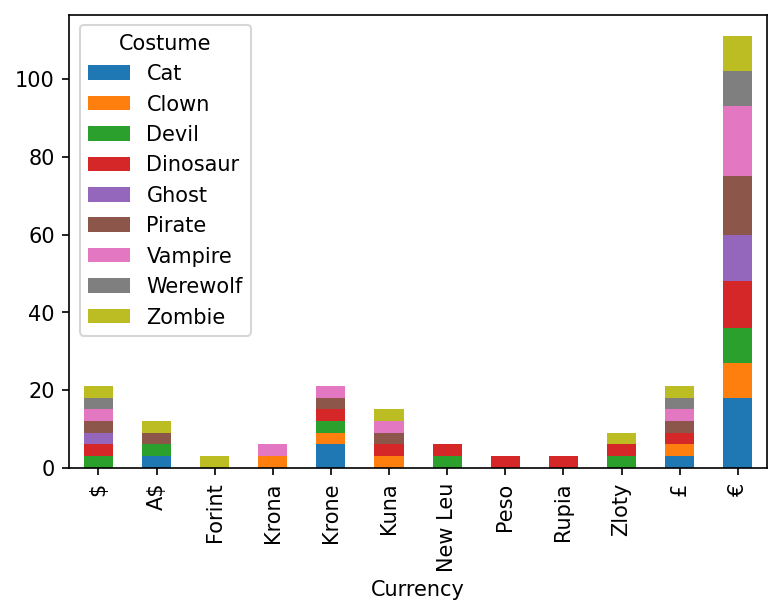

In [ ]:
plt.rcParams['figure.dpi'] = 150
df_plot1.plot(kind='bar', stacked=True)

Vemos que el Euro es la moneda en la que más se compran disfraces, seguido por el Dolar, el Krone y la Libra. Además podemos observar que los disfraces favoritos son el de gato, el de vampiro y el de pirata.

In [ ]:
df['Costume'].unique()

array(['Dinosaur', 'Cat', 'Ghost', 'Vampire', 'Pirate', 'Zombie', 'Clown',
       'Devil', 'Werewolf'], dtype=object)

In [ ]:
din = df['Ganancia Total'].loc[(df['Costume']=='Dinosaur')].sum()
cat = df['Ganancia Total'].loc[(df['Costume']=='Cat')].sum()
gh = df['Ganancia Total'].loc[(df['Costume']=='Ghost')].sum()
vamp = df['Ganancia Total'].loc[(df['Costume']=='Vampire')].sum()
pir = df['Ganancia Total'].loc[(df['Costume']=='Pirate')].sum()
zom = df['Ganancia Total'].loc[(df['Costume']=='Zombie')].sum()
cl = df['Ganancia Total'].loc[(df['Costume']=='Clown')].sum()
de = df['Ganancia Total'].loc[(df['Costume']=='Devil')].sum()
ww = df['Ganancia Total'].loc[(df['Costume']=='Werewolf')].sum()

In [ ]:
Ganancias = pd.DataFrame([['Dinosaur', din], ['Cat', cat], ['Ghost', gh], ['Vampire', vamp], ['Pirate', pir], ['Zombie', zom], ['Clown', cl], ['Devil', de], ['WereWolf', ww]])
Ganancias

0            1
0  Dinosaur  30036779767
1       Cat     44719791
2     Ghost      8297457
3   Vampire     52512699
4    Pirate     42156952
5    Zombie    651782026
6     Clown     39795503
7     Devil     45151488
8  WereWolf      9247989

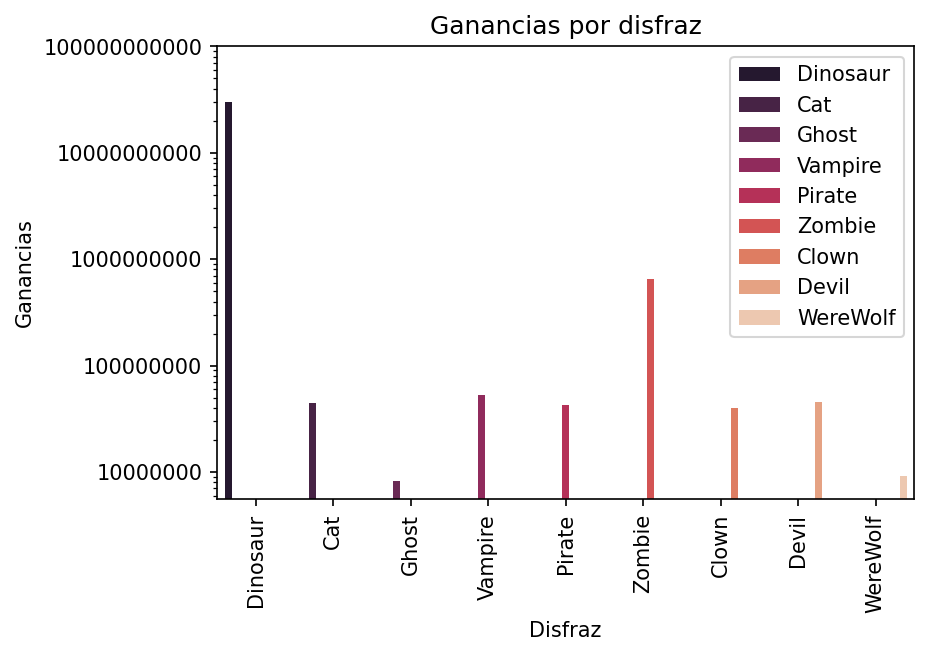

In [ ]:
g = sns.barplot(x=0, y=1, data=Ganancias, hue=0, palette="rocket")
g.set_yscale("log") #Para poder ver bien los valores de la gráfica toca verlo en una escala logarítmica
g.set_xticklabels(g.get_xticklabels(), rotation=90)

ticks = [10000000,100000000, 1000000000, 10000000000, 100000000000]
g.set_yticks(ticks)
g.set_yticklabels(ticks)

plt.title('Ganancias por disfraz')
plt.ylabel('Ganancias')
plt.xlabel('Disfraz')

g

Como podemos observar en la gráfica anterior, que está en escala logarítmica, vemos que el disfráz que más ganancias da es el de dinosaurio pero de una manera avismal, con ganancias superiores a $10^{10}$ mientras que el segundo que más ganancias da es el de Zombie que da poco menos de $10^9$.

## 5. Análisis de regreción

En esta sección reduciremos los datos para hacer una simple regresión lineal que nos permita inferir que podría suceder en el año fiscal siguient, no necesariamente debe suceder pero es una buena posibilidad.

In [ ]:
df.head()

Costume      Country Currency  ... 2019 FY Sales  2020 FY Sales  Ganancia Total
0  Dinosaur      Croatia     Kuna  ...       6970468        6186874        13157342
1       Cat  Netherlands        €  ...          7146           7734           14880
2     Ghost      Ireland        €  ...         14574          16030           30604
3   Vampire      Denmark    Krone  ...         86640          61320          147960
4    Pirate      Croatia     Kuna  ...        117271         105970          223241

[5 rows x 7 columns]

Con los datos tenemos que en ambos años se vendieron la misma cantidad de disfraces y descuentos.

Por lo que solo haremos una regresión de las ganancias.

In [ ]:
g2019 = df['2019 FY Sales'].sum().astype(int)
g2020 = df['2020 FY Sales'].sum().astype(int)
x, y = int('2019'), int('2020')
dflr = pd.DataFrame([[x, g2019], [y, g2020]])
dflr

0            1
0  2019  16152460385
1  2020  14777983287

In [ ]:
pend, interc, corr, p_valor, error_std = stats.linregress(dflr[0], dflr[1])

In [ ]:
dflr['modelo'] =  pend * dflr[0] + interc

[Text(0, 0, '2019'), Text(0, 0, '2020')]

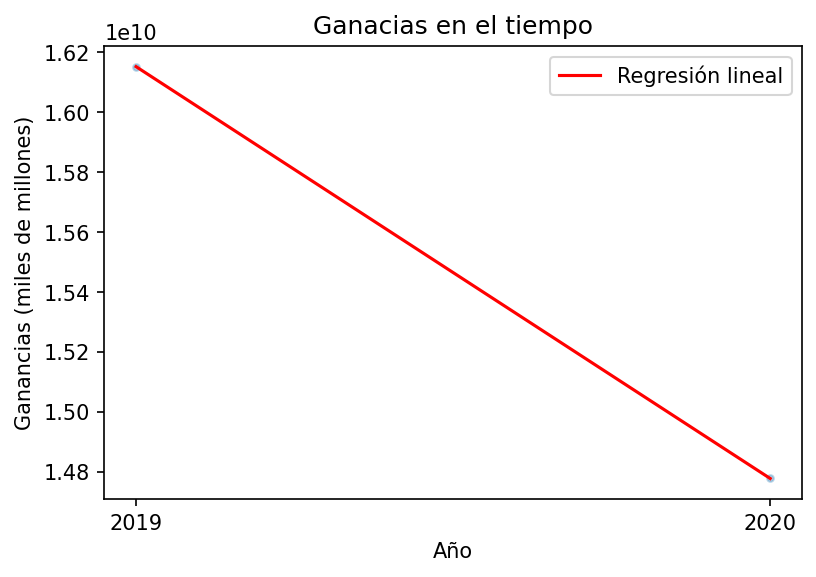

In [ ]:
ticks = [2019, 2020]
ax = dflr.plot.scatter(0, 1, title="Ganacias en el tiempo",
                s = 10, alpha = 0.3, grid=True)
dflr.plot.line(0, 'modelo', 
                   c='r', label='Regresión lineal', ax=ax); 
plt.xlabel('Año')
plt.ylabel('Ganancias (miles de millones)')

ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

Como vemos las ganancias del año anterior con la misma cantidad de ventas tuvo mejores rendimientos, por lo que sugerimos, para el año fiscal que se aproxima, centrarse en la venta de los disfraces que más rentabilidad dieron y mencionamos arriba e intentar vender más disfraces con el precio completo, dado que solo el 33% de las ventas se hicieron con el coste total, lo cual limita las ganacias, como vimos en el apartado correspondiente, donde con solo un 33% de las ventas consiguió el 97% de las ganancias.

## 6. Referencias

[1] Recuperado de: [¿Cuál es el origen de Halloween?](https://www.ngenespanol.com/traveler/cual-es-el-origen-de-halloween-samhain/)

[2] Recuperado de: [Tradiciones de Halloween](https://www.lavanguardia.com/vida/junior-report/20181026/452556513250/tradiciones-halloween-calabaza-fantasma-truco-trato.html#foto-1)

[3] Recuperado de: [Halloween: más historia, religión y fiesta que horror](https://www.france24.com/es/20181031-halloween-noche-brujas-latinoamerica-tradicion)

[4] Recuperado de: [Todo para Halloween con niños: disfraces, manualidades, recetas, decoración, planes e ideas](https://saposyprincesas.elmundo.es/especiales/halloween-ninos-manualidades-recetas-decoracion-planes-ideas/)

[5] Recuperado de: [Los mejores disfraces de Halloween para perros y gatos](https://cnnespanol.cnn.com/cnne-underscored/2021/10/26/los-mejores-disfraces-de-halloween-para-perros-y-gatos/)

# Agradecimiento

A Grow Up por permitirme participar en esta iniciativa, espero estar a la altura del reto y me esforzaré por seguir mejorando para tener cada vez mejores participaciones.